In [103]:
import numpy as np
import pandas as pd
import yfinance as yf
from optionprice import Option
import matplotlib.pyplot as plt

#partiamo raccogliendo i dati dell'indice S&P 500 dal 2020 al 2022 con cadenza giornaliera
data = yf.download(tickers = "SPY", start = "2020-01-01", end = "2022-01-01", interval = "1d")

[*********************100%***********************]  1 of 1 completed


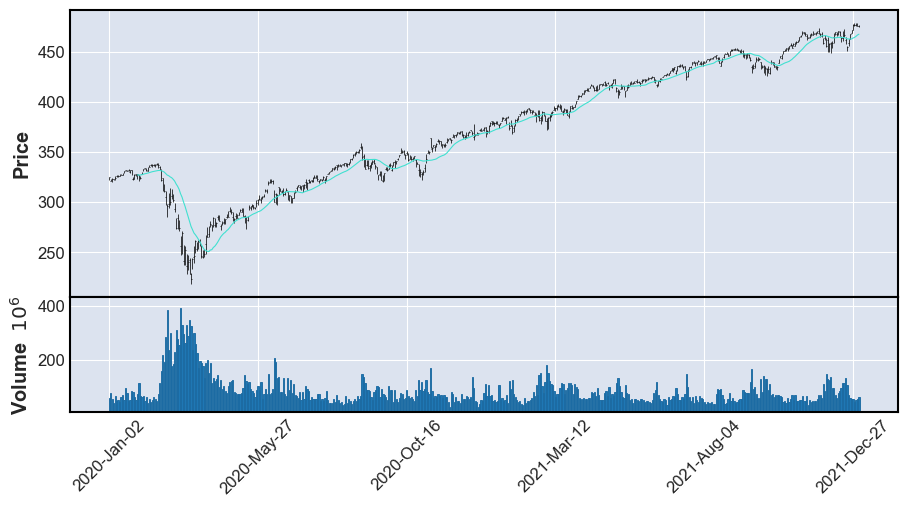

In [104]:
#creiamo il grafico giornaliero dell'indice
#aggiungo anche l'indicatore dei volumi e la media mobile a 20 candele
mpf.plot(data['2020-01':'2022-01'], mav=(20), volume=True, figratio=(30,15))

In [105]:
#andrò a calcolare il prezzo dell'opzione nel giorno di apertura con il black scholes model
#al posto del black scholes model posso usare il metodo Monte Carlo oppure il metodo Binomial Tree
#calcolo la moneyness(profitto/perdita) dell'opzione per ogni giorno della sua durata
#in questo modo mostro di fatto l'andamento della moneyness durante la 'vita' dell'opzione
#questo viene fatto rispetto al prezzo medio(calcolato come media tra low e hig) dell'S&P 500 nei giorni di interesse
#data in cui acquistare o vendere l'opzione e la scandenza (maturity)

moneynessLong=[]  #array per memorizzare i dati della moneyness in caso di acquisto dell'opzione
moneynessShort=[] #array per memorizzare i dati della moneyness in caso di vendita dell'opzione
x=[]              #array per l'asse delle x nel grafico, contierrà il giorno di riferimento della moneyness

#selezione dell'intervallo!
#a seguire c'è il comando che estrae un intervallo di dati da quelli scaricati dell'S&P 500
#questo intervallo è da intendere come la durata dell'opzione che vogliamo considerare
campione=data['2020-02-01':'2021-06-03']

#salvo il numero di giorni dell'intervallo selezionato(nota che sono i giorni effettivi di apertura dell'indice)
giorni=len(campione.index)

high=campione.High               #salvo gli high dei giorni interessati
low=campione.Low                 #salvo i low dei giorni interessati
index=campione.index             #salvo le date dei giorni interessati

endDay=str(index.date[giorni-1]) #estraggo la data del giorno di scadenza
date=str(index.date[0])          #estraggo la data del giorno di inizio
alto=high.iloc[0]                #etraggo massimo del giorno di inizio
basso=low.iloc[0]                #estraggo minimo del giono di inizio
primoMedio=(alto+basso)/2        #ne faccio una media

#imposto lo strike price per l'opzione che si vuole valutare
strikePrice = 300

#creo un opzione con i valori raccolti e prezzo di inizio uguale al prezzo medio dell'asset di quel giorno
option= Option(european=False,   #True if the option is an European option and False if it's an American one
               kind='call',      #tipo di opzione
               s0=primoMedio,    #initial price
               k=strikePrice,    #lo strike price
               sigma=0.01,       #la volatilità assunta
               r=0.05,           #risk free interest rate
               start=date,       #beginning date of the option
               end=endDay,       #end date of the option
               dv=0)             #dividend rate

#calcolo il prezzo che l'azione ha nel primo giorno con metodo black scholes
premio = option.getPrice()       #getPrice(method='MC'||'BT',iteration = 500000) per metodo monte carlo oppure binomial tree


#comincio il ciclo di calcolo del prezzo dell'opzione per ogni giorno
for i in range(giorni):
    alto=high.iloc[i]
    basso=low.iloc[i]
    medio=(alto+basso)/2
    #costruisco un array con la moneyness dell'opzione di ogni giorno
    if medio>strikePrice:
        moneynessLong=moneynessLong+[medio-strikePrice-premio]
    if medio<strikePrice:
        moneynessLong=moneynessLong+[-premio]
        
    if medio>strikePrice:
        moneynessShort=moneynessShort+[strikePrice+premio-medio]
    if medio<strikePrice:
        moneynessShort=moneynessShort+[premio]
    #popolo l'array dei giorni
    x=x+[i]
print("il costo dell'opzione è:")
print(premio)
#print(moneynessShort)

il costo dell'opzione è:
44.01227543319362


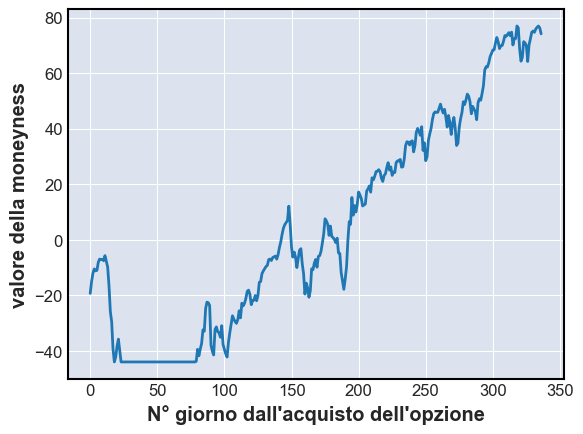

In [106]:
#mostro il grafico dell'andamento della moneyness dall'acquisto dell'opzione alla scadenza
plt.plot(x,moneynessLong)
plt.xlabel('N° giorno dall\'acquisto dell\'opzione')
plt.ylabel('valore della moneyness')
plt.show()

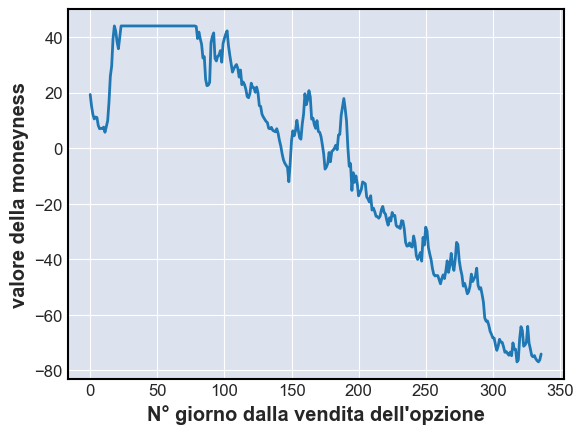

In [111]:
#mostro il grafico dell'andamento della moneyness dalla vendita dell'opzione alla scadenza
plt.plot(x, moneynessShort)
plt.xlabel('N° giorno dalla vendita dell\'opzione')
plt.ylabel('valore della moneyness')
plt.show()

In [108]:
#andrò a calcolare il prezzo dell'opzione nel giorno di apertura con il black scholes model
#al posto del black scholes model posso usare il metodo Monte Carlo oppure il metodo Binomial Tree
#calcolo la moneyness(profitto/perdita) dell'opzione per ogni giorno della sua durata
#in questo modo mostro di fatto l'andamento della moneyness durante la 'vita' dell'opzione
#questo viene fatto rispetto al prezzo medio(calcolato come media tra low e hig) dell'S&P 500 nei giorni di interesse
#data in cui acquistare o vendere l'opzione e la scandenza (maturity)

moneynessLongPut=[]  #array per memorizzare i dati della moneyness in caso di acquisto dell'opzione
moneynessShortPut=[] #array per memorizzare i dati della moneyness in caso di vendita dell'opzione
xPut=[]              #array per l'asse delle x nel grafico, contierrà il giorno di riferimento della moneyness

#selezione dell'intervallo!
#a seguire c'è il comando che estrae un intervallo di dati da quelli scaricati dell'S&P 500
#questo intervallo è da intendere come la durata dell'opzione che vogliamo considerare
campione=data['2020-02-01':'2021-06-03']

#salvo il numero di giorni dell'intervallo selezionato(nota che sono i giorni effettivi di apertura dell'indice)
giorni=len(campione.index)

high=campione.High               #salvo gli high dei giorni interessati
low=campione.Low                 #salvo i low dei giorni interessati
index=campione.index             #salvo le date dei giorni interessati

endDay=str(index.date[giorni-1]) #estraggo la data del giorno di scadenza
date=str(index.date[0])          #estraggo la data del giorno di inizio
alto=high.iloc[0]                #etraggo massimo del giorno di inizio
basso=low.iloc[0]                #estraggo minimo del giono di inizio
primoMedio=(alto+basso)/2        #ne faccio una media

#imposto lo strike price per l'opzione che si vuole valutare
strikePrice = 400

#creo un opzione con i valori raccolti e prezzo di inizio uguale al prezzo medio dell'asset di quel giorno
option= Option(european=True,   #True if the option is an European option and False if it's an American one
               kind='put',      #tipo di opzione
               s0=primoMedio,    #initial price
               k=strikePrice,    #lo strike price
               sigma=0.01,       #la volatilità assunta
               r=0.05,           #risk free interest rate
               start=date,       #beginning date of the option
               end=endDay,       #end date of the option
               dv=0)             #dividend rate

#calcolo il prezzo che l'azione ha nel primo giorno con metodo black scholes
premioPut = option.getPrice()       #getPrice(method='MC'||'BT',iteration = 500000) per metodo monte carlo oppure binomial tree


#comincio il ciclo di calcolo del prezzo dell'opzione per ogni giorno
for i in range(giorni):
    alto=high.iloc[i]
    basso=low.iloc[i]
    medio=(alto+basso)/2
    #costruisco un array con la moneyness dell'opzione di ogni giorno
    if medio>strikePrice:
        moneynessLongPut=moneynessLongPut+[medio-strikePrice-premioPut]
    if medio<strikePrice:
        moneynessLongPut=moneynessLongPut+[-premio]
        
    if medio>strikePrice:
        moneynessShortPut=moneynessShortPut+[strikePrice+premioPut-medio]
    if medio<strikePrice:
        moneynessShortPut=moneynessShortPut+[premioPut]
    #popolo l'array dei giorni
    xPut=xPut+[i]
print("il costo dell'opzione è:")
print(premioPut)
#print(moneynessShort)

il costo dell'opzione è:
49.546966902877216


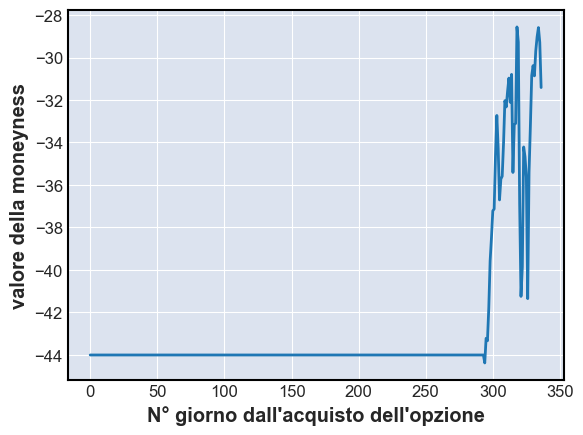

In [109]:
#mostro il grafico dell'andamento della moneyness dall'acquisto dell'opzione alla scadenza
plt.plot(x,moneynessLongPut)
plt.xlabel('N° giorno dall\'acquisto dell\'opzione')
plt.ylabel('valore della moneyness')
plt.show()

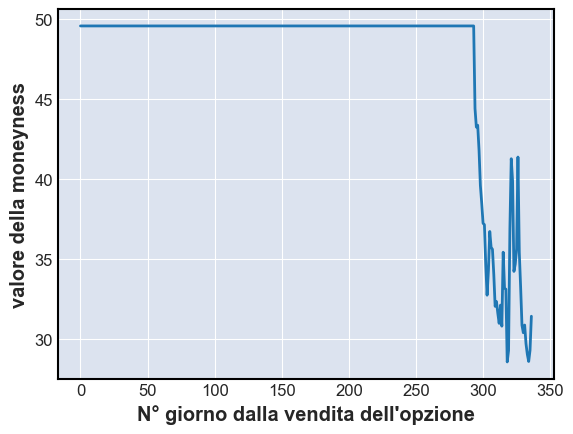

In [110]:
#mostro il grafico dell'andamento della moneyness dalla vendita dell'opzione alla scadenza
plt.plot(x, moneynessShortPut)
plt.xlabel('N° giorno dalla vendita dell\'opzione')
plt.ylabel('valore della moneyness')
plt.show()